In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset

df = pd.read_csv("creditcard.csv.csv")

In [5]:
# Display the first few rows of the dataset
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
# Data Exploration
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data Preprocessing
# Normalize the 'Amount' and 'Time' columns
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52404 entries, 0 to 52403
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    52404 non-null  int64  
 1   V1      52404 non-null  float64
 2   V2      52404 non-null  float64
 3   V3      52404 non-null  float64
 4   V4      52404 non-null  float64
 5   V5      52404 non-null  float64
 6   V6      52404 non-null  float64
 7   V7      52404 non-null  float64
 8   V8      52404 non-null  float64
 9   V9      52404 non-null  float64
 10  V10     52404 non-null  float64
 11  V11     52404 non-null  float64
 12  V12     52404 non-null  float64
 13  V13     52404 non-null  float64
 14  V14     52404 non-null  float64
 15  V15     52403 non-null  float64
 16  V16     52403 non-null  float64
 17  V17     52403 non-null  float64
 18  V18     52403 non-null  float64
 19  V19     52403 non-null  float64
 20  V20     52403 non-null  float64
 21  V21     52403 non-null  float64
 22

In [11]:
# Check for missing values in y
print(y.isnull().sum())

# Drop rows where 'y' has missing values
df_cleaned = df.dropna(subset=['Class'])

# Define the feature set and target variable again
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# Handle missing values by imputing with the mean of the column for features
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


1
Accuracy: 0.9998091785135006
Precision: 1.0
Recall: 0.9166666666666666
F1 Score: 0.9565217391304348


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

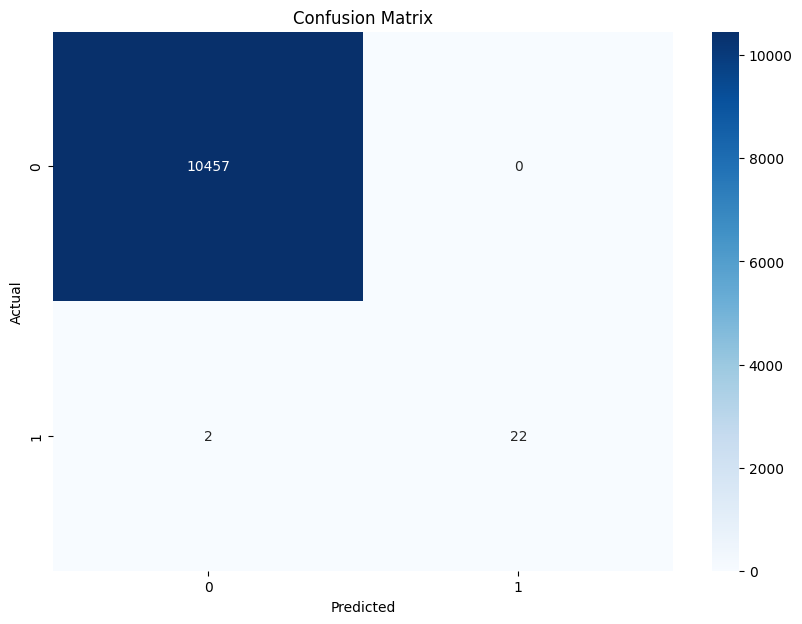

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10457
         1.0       1.00      0.92      0.96        24

    accuracy                           1.00     10481
   macro avg       1.00      0.96      0.98     10481
weighted avg       1.00      1.00      1.00     10481



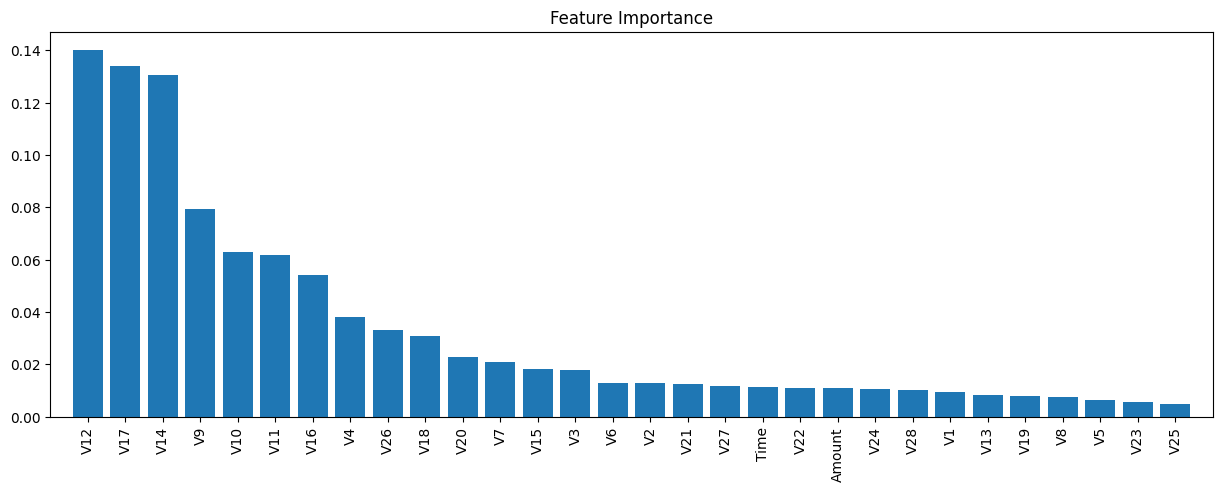

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
